### San Francisco State University: School of Engineering
### ENGR 463: Final Exam Project (Spring 2023)
### By Elon Goliger Mallimson
### Professor: Dr. Douglas Couldron
### Date: 5/10/2023
#### Part A: Variable Speed, Constant Load Test

In [171]:

#dependencies
from pint import UnitRegistry
import numpy as np
import pandas as pd

#unit setup
ureg = UnitRegistry()
m = ureg.meter
g = ureg.gram
kg = ureg.kilogram
s = ureg.second
min = ureg.minute
hr = ureg.hour
rpm = ureg.revolution / min
turns = ureg.turn
kPa = ureg.kilopascal
W = ureg.watt
N = ureg.newton
K = ureg.kelvin
#variable array setup
speed = ureg.Quantity(np.array([1500, 2000, 2500, 3000, 3500, 4000]), rpm)
torque = ureg.Quantity(np.array([1.8, 1.8, 1.8, 1.8, 1.8, 1.8]), N * m)
Qdot_shaft = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # Qdot_shaft
Qdot_in = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # heat input
efficiency = np.array([None, None, None, None, None, None]) # n_th percent
MEP = ureg.Quantity(np.array([None, None, None, None, None, None]), kPa) # mean effective pressure
bsfc = ureg.Quantity(np.array([None, None, None, None, None, None]), g / (W * hr)) # brake specific fuel consumption
Qdot_exhaust = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # exhaust heat
Qdot_fins = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # fins heat
mdot_air = ureg.Quantity(np.array([None, None, None, None, None, None]), kg/s) # mass flow rate of air
mdot_fuel = ureg.Quantity(np.array([5.55E-05, 5.64E-05, 6.83E-05, 8.26E-05, 0.000104, 0.000118]), kg / s) # mass flow rate of fuel
deltaT = ureg.Quantity(np.array([247, 247, 247, 291, 330, 350]), K) # temperature difference

In [172]:
#constants
rho_air = 1.2 * ureg.kilogram / ureg.meter**3
Cp_air = 1.006 * ureg.kilojoule / (ureg.kilogram * ureg.kelvin)
LHV_gas = 45.2 * ureg.kilojoule / ureg.gram
#calculations
D = 10**-4 * m**3 # displacement of the engine
mdot_air = (rho_air * D * speed) / (2*turns) # The 2 is present in the denominator because engine will only draw air every second revolution
mdot_air = mdot_air.to(kg / s)
print(mdot_air)
Qdot_exhaust = mdot_air * Cp_air * deltaT
print(Qdot_exhaust)
Qdot_in = mdot_fuel * LHV_gas
Qdot_in = Qdot_in.to(W)
print(Qdot_in)
Qdot_shaft = speed*torque
Qdot_shaft = Qdot_shaft.to(W)
print(Qdot_shaft)
Qdot_fins = Qdot_in - Qdot_exhaust - Qdot_shaft
print(Qdot_fins)
efficiency = (Qdot_shaft / Qdot_in)*100 # n_th percent
print(efficiency)
bsfc = mdot_fuel / Qdot_shaft
bsfs = bsfc.to(g / (W * hr))
print(bsfc)
MEP = (4 * np.pi * torque )/ D
MEP = MEP.to(kPa)
print(MEP)


[0.0015 0.002  0.0025 0.003  0.0035 0.004 ] kilogram / second
[0.372723 0.496964 0.621205 0.878238 1.16193  1.4084  ] kilojoule / second
[2508.6  2549.28 3087.16 3733.52 4700.8  5333.6 ] watt
[282.74333882 376.99111843 471.23889804 565.48667765 659.73445725 753.98223686] watt
[1853.13366118 1675.32488157 1994.71610196 2289.79532235 2879.13554275 3171.21776314] watt
[11.27096145 14.7881409  15.26447926 15.14620727 14.03451449 14.13646012] dimensionless
[1.96291096e-07 1.49605647e-07 1.44937102e-07 1.46068870e-07 1.57639182e-07 1.56502361e-07] kilogram / second / watt
[226.19467106 226.19467106 226.19467106 226.19467106 226.19467106 226.19467106] kilopascal


In [173]:
# Create a dictionary with the column names and data
data = {
    'Speed (RPM)': speed.magnitude,
    'Torque (N m)': torque.magnitude,
    'Power Shaft (W)': Qdot_shaft.magnitude,
    'Power Input (W)': Qdot_in.magnitude,
    'Efficiency (%)': efficiency.magnitude,
    'MEP (kPa)': MEP.magnitude,
    'BSFC (g/(W*h))': bsfc.magnitude,
    'Exhaust Heat (W)': Qdot_exhaust.magnitude,
    'Fins Heat (W)': Qdot_fins.magnitude,
    'Air Mass Flow (kg/s)': mdot_air.magnitude,
    'Fuel Mass Flow (kg/s)': mdot_fuel.magnitude,
    'Delta T (delta_K)': deltaT.magnitude
}

# Create a DataFrame from the dictionary and add a caption
df = pd.DataFrame(data)
df

,Speed (RPM),Torque (N m),Power Shaft (W),Power Input (W),Efficiency (%),MEP (kPa),BSFC (g/(W*h)),Exhaust Heat (W),Fins Heat (W),Air Mass Flow (kg/s),Fuel Mass Flow (kg/s),Delta T (delta_K)
0,1500,1.8,282.743339,2508.60,11.270961,226.194671,1.962911e-07,0.372723,1853.133661,0.0015,0.000056,247
1,2000,1.8,376.991118,2549.28,14.788141,226.194671,1.496056e-07,0.496964,1675.324882,0.0020,0.000056,247
2,2500,1.8,471.238898,3087.16,15.264479,226.194671,1.449371e-07,0.621205,1994.716102,0.0025,0.000068,247
3,3000,1.8,565.486678,3733.52,15.146207,226.194671,1.460689e-07,0.878238,2289.795322,0.0030,0.000083,291
4,3500,1.8,659.734457,4700.80,14.034514,226.194671,1.576392e-07,1.161930,2879.135543,0.0035,0.000104,330
5,4000,1.8,753.982237,5333.60,14.136460,226.194671,1.565024e-07,1.408400,3171.217763,0.0040,0.000118,350


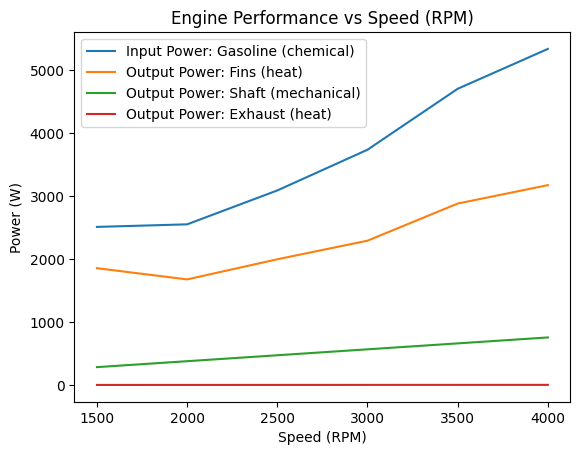

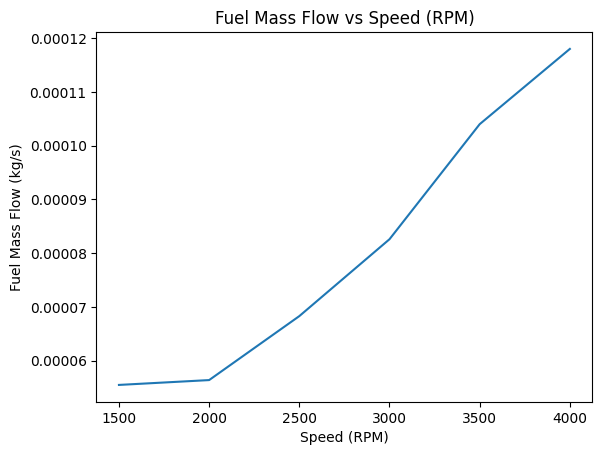

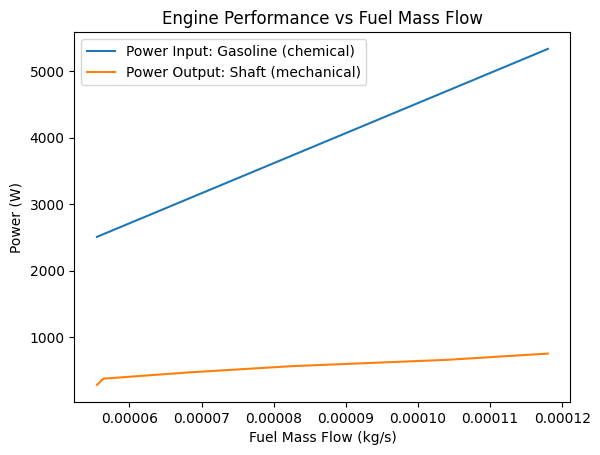

In [179]:
import matplotlib.pyplot as plt

# Plot Qdot_shaft, Qdot_in, Qdot_exhaust, Qdot_fins vs RPM
plt.figure()
plt.plot(df['Speed (RPM)'], df['Power Input (W)'], label="Input Power: Gasoline (chemical)")
plt.plot(df['Speed (RPM)'], df['Fins Heat (W)'], label="Output Power: Fins (heat)")
plt.plot(df['Speed (RPM)'], df['Power Shaft (W)'], label="Output Power: Shaft (mechanical)")
plt.plot(df['Speed (RPM)'], df['Exhaust Heat (W)'], label="Output Power: Exhaust (heat)")
plt.xlabel('Speed (RPM)')
plt.ylabel('Power (W)')
plt.legend()
plt.title('Engine Performance vs Speed (RPM)')
plt.show()

# Plot fuel flow rate vs rpm
plt.figure()
plt.plot(df['Speed (RPM)'], df['Fuel Mass Flow (kg/s)'])
plt.xlabel('Speed (RPM)')
plt.ylabel('Fuel Mass Flow (kg/s)')
plt.title('Fuel Mass Flow vs Speed (RPM)')
plt.show()

# Plot Qdot_shaft, Qdot_in vs fuel flow rate
plt.figure()
plt.plot(df['Fuel Mass Flow (kg/s)'], df['Power Input (W)'], label="Power Input: Gasoline (chemical)")
plt.plot(df['Fuel Mass Flow (kg/s)'], df['Power Shaft (W)'], label="Power Output: Shaft (mechanical)")
plt.xlabel('Fuel Mass Flow (kg/s)')
plt.ylabel('Power (W)')
plt.legend()
plt.title('Engine Performance vs Fuel Mass Flow')
plt.show()
